In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
train = pd.DataFrame({"x1": [1,1,-1,-1, 1, 3, 5], "x2": [-1,1,-1,2, 3, 3, 3], "class": [-1,-1,-1,1,1,1,1]})
train

,class,x1,x2
0,-1,1,-1
1,-1,1,1
2,-1,-1,-1
3,1,-1,2
4,1,1,3
5,1,3,3
6,1,5,3


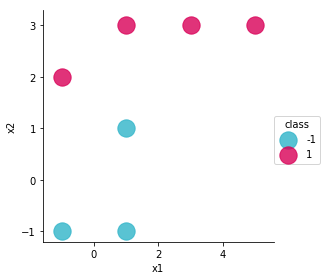

In [3]:
sns.lmplot(x='x1', y='x2', fit_reg=False, data=train, hue = 'class', palette = ["#30B4C9", "#d90057"], scatter_kws = {"s": 300}, size = 4)

In [4]:
from random import *

def train_adaline(train, output, n):
    T = 16000
    w0 = 0
    t = 0
    m = train.shape[0]
    x = train.loc[:,train.columns != output]
    y = train.loc[:,output]
    w = pd.Series([0,0], index= x.columns)
    while t<T:
        i = randint(0, m-1)
        x_i = x.loc[i,:]
        y_i = y[i]
        hw = w0+x_i.dot(w)
        #print("hw, y_i, x_i")
        #print(hw)
        w0 = w0 + n*(y_i - hw)
        w = w + n*(y_i - hw)*x_i
        #print(y_i)
        #print(x_i)
        t+=1
    return(w, w0)

In [5]:
w, w0 = train_adaline(train, "class", 0.01)
print("w0, w")
print(w0)
print(w)

w0, w
-0.584060182441
x1   -0.052935
x2    0.590631
dtype: float64


(-3, 6)

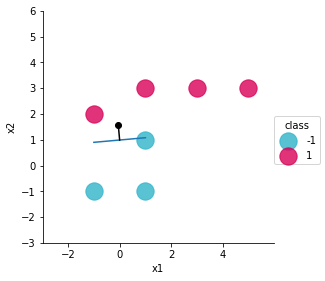

In [6]:
a = sns.lmplot(x='x1', y='x2', fit_reg=False, data=train, hue = 'class', palette = ["#30B4C9", "#d90057"], scatter_kws = {"s": 300}, size = 4)
import math
## x2 = -x1*w[0]/w[1] + w0/w[1]
def separator(x1, w, w0):
    return -x1*1.*w[0]/w[1] - 1.*w0/w[1]
plt.plot([-1,1],[separator(-1, w, w0), separator(1, w, w0)])
plt.plot([0,w[0]], [-1.*w0/w[1],w[1]-1.*w0/w[1]], color = "black")
plt.scatter([w[0]], [w[1]-1.*w0/w[1]], color = "black")
plt.axis('equal')
plt.xlim(-3,6)
plt.ylim(-3,6)